# Image Classification with Keras Hub - Easy Level

This notebook demonstrates how to use a pre-trained image classification model from TensorFlow Hub for image classification tasks. We'll start with importing the necessary libraries and setting up our environment.

In [1]:
# Import required libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import PIL.Image as Image

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.18.0
TensorFlow Hub version: 0.16.1


## Loading a Pre-trained Image Classification Model

Let's use a pre-trained model from Keras applications instead of TensorFlow Hub. This approach is more reliable in Colab environments.

In [5]:
# Use a pre-trained model from Keras applications
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Create the base model from MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=True)

# Print model summary
base_model.summary()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Image Preprocessing and Prediction

Now let's load a sample image and use our model to make a prediction. We'll use the preprocessing functions specific to MobileNetV2 and display the top predictions.

--2025-04-22 01:01:50--  https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61306 (60K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  59.87K  --.-KB/s    in 0.001s  

2025-04-22 01:01:51 (95.5 MB/s) - ‘test_image.jpg’ saved [61306/61306]



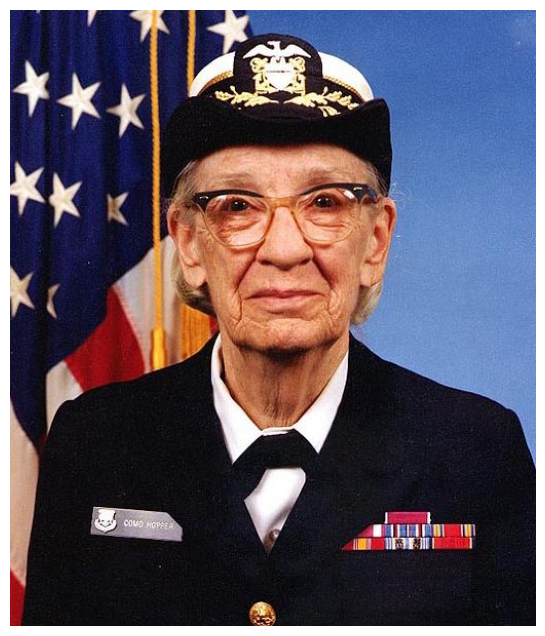

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1: military_uniform (0.88)
2: suit (0.01)
3: Windsor_tie (0.01)
4: bearskin (0.01)
5: ballplayer (0.00)


In [7]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    # Load image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    # Convert to array and expand dimensions
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    # Preprocess input for MobileNetV2
    return preprocess_input(img_array)

# URL of a sample image to classify (uncomment and change if needed)
!wget -O test_image.jpg "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg"
# image_path = "/content/test_image.jpg"  # Update this path if needed

# Visualization of the test image
plt.figure(figsize=(8, 8))
img = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction
preprocessed_img = load_and_preprocess_image(image_path)
predictions = base_model.predict(preprocessed_img)

# Decode and display top 5 predictions
print("Top predictions:")
for i, (imagenet_id, label, score) in enumerate(decode_predictions(predictions)[0]):
    print(f"{i+1}: {label} ({score:.2f})")

## Processing Multiple Images

Let's expand our analysis to handle multiple images and display their predictions in a grid layout. This demonstrates how to batch process images through the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


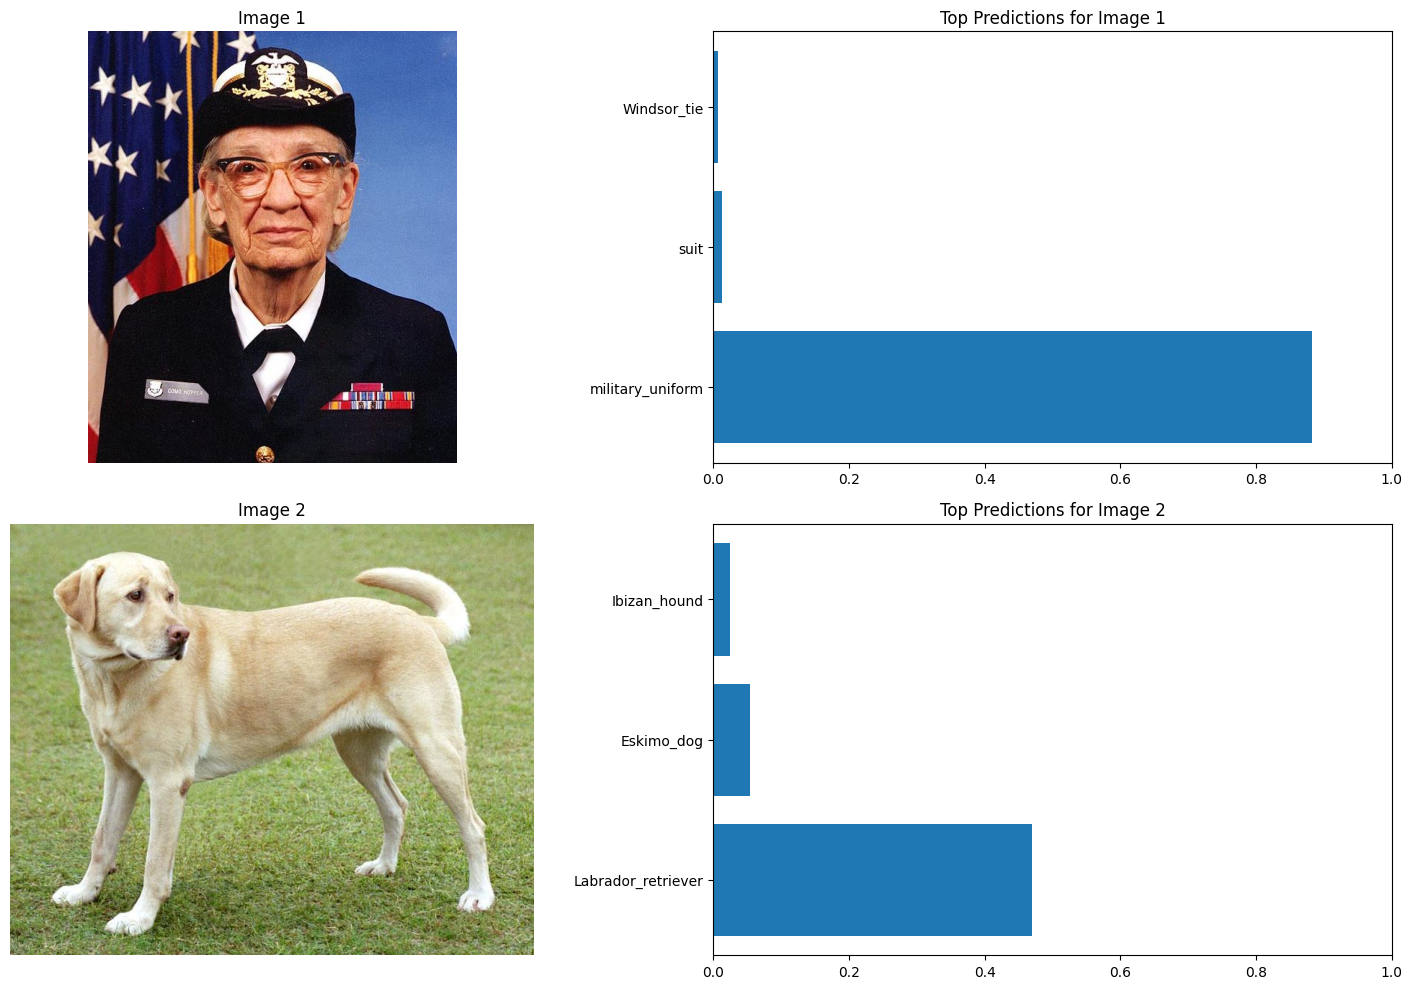

In [9]:
# Let's download some sample images
import os

# Download a few sample images if they don't exist
sample_images = [
    "https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg",
    "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg",
]

image_paths = []
for i, image_url in enumerate(sample_images):
    img_path = f"/content/sample_image_{i}.jpg"
    if not os.path.exists(img_path):
        !wget -q -O {img_path} {image_url}
    image_paths.append(img_path)

# Function to process multiple images and show predictions
def predict_and_plot_multiple(image_paths):
    plt.figure(figsize=(15, 5*len(image_paths)))

    for i, img_path in enumerate(image_paths):
        # Load and preprocess image
        preprocessed_img = load_and_preprocess_image(img_path)
        predictions = base_model.predict(preprocessed_img)
        decoded_predictions = decode_predictions(predictions, top=3)[0]

        # Display image and predictions
        plt.subplot(len(image_paths), 2, 2*i+1)
        img = tf.keras.preprocessing.image.load_img(img_path)
        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')

        # Display predictions
        plt.subplot(len(image_paths), 2, 2*i+2)
        plt.barh([p[1] for p in decoded_predictions], [p[2] for p in decoded_predictions])
        plt.xlim(0, 1)
        plt.title(f"Top Predictions for Image {i+1}")

    plt.tight_layout()
    plt.show()

# Predict and visualize
predict_and_plot_multiple(image_paths)

## Visualizing Intermediate Layer Activations

Now let's explore what happens inside our model by visualizing the activations of intermediate layers. This gives us insight into how the model processes images and what features it recognizes at different stages.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


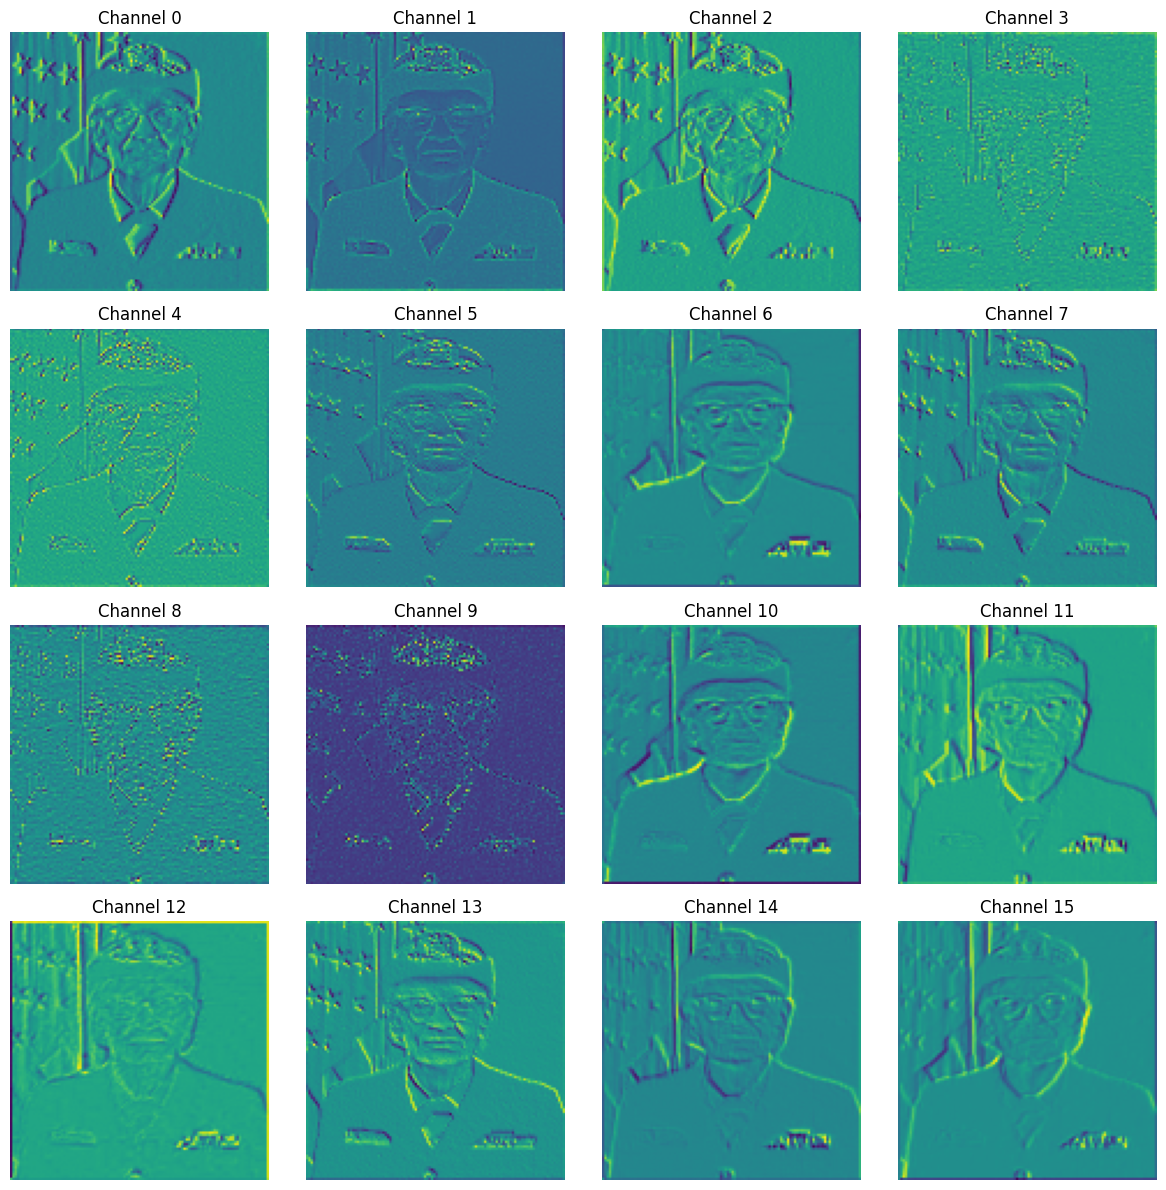

In [10]:
# Create a model that will output the activations of a specific layer
def get_intermediate_model(model, layer_name):
    # Find the specified layer
    selected_layer = None
    for layer in model.layers:
        if layer_name in layer.name:
            selected_layer = layer
            break

    if selected_layer is None:
        print(f"Layer with name containing '{layer_name}' not found!")
        return None

    # Create a model that outputs the activations of the specified layer
    intermediate_model = tf.keras.Model(
        inputs=model.input,
        outputs=selected_layer.output
    )
    return intermediate_model

# Choose a layer to visualize (typically a middle convolutional layer)
layer_name = "block"  # This will match layers like "block_1_", "block_2_", etc.

# Create an intermediate model
intermediate_model = get_intermediate_model(base_model, layer_name)

# Get a sample image
sample_img_path = image_paths[0]  # Using the first image from our previous examples
preprocessed_img = load_and_preprocess_image(sample_img_path)

# Get intermediate activations
activations = intermediate_model.predict(preprocessed_img)

# Plot the activations
def plot_activations(activations, max_channels=16):
    # Determine the number of channels to display
    channels = min(activations.shape[-1], max_channels)

    # Create a grid for visualization
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.flatten()

    # Display activations for each channel
    for i in range(channels):
        if i < len(axes):
            feature_map = activations[0, :, :, i]
            axes[i].imshow(feature_map, cmap='viridis')
            axes[i].set_title(f'Channel {i}')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize activations
plot_activations(activations)

## Feature Extraction and Transfer Learning

Now let's implement transfer learning with MobileNetV2. We'll use the pre-trained model as a feature extractor and add our own classification layer on top. This approach allows us to leverage the powerful features learned by MobileNetV2 while customizing the model for our specific task.

In [11]:
# Create a model for feature extraction
base_model_features = MobileNetV2(weights='imagenet', include_top=False)

# Freeze the base model to prevent its weights from being updated during training
base_model_features.trainable = False

# Create a new model on top
model = tf.keras.Sequential([
  base_model_features,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')  # 5 classes for example
])

# Compile the model
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

# Print the model summary
model.summary()

<ipython-input-11-f29acf81cd0f>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_features = MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, None, None,     │     2,257,984 │
│ (Functional)                    │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Preparing a Small Dataset for Training

Now let's set up a small image dataset for training. We'll use the TensorFlow Datasets library to access the Flowers dataset, which contains images of flowers in 5 different categories. This dataset is convenient for demonstration purposes.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.9JCZEY_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Class names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


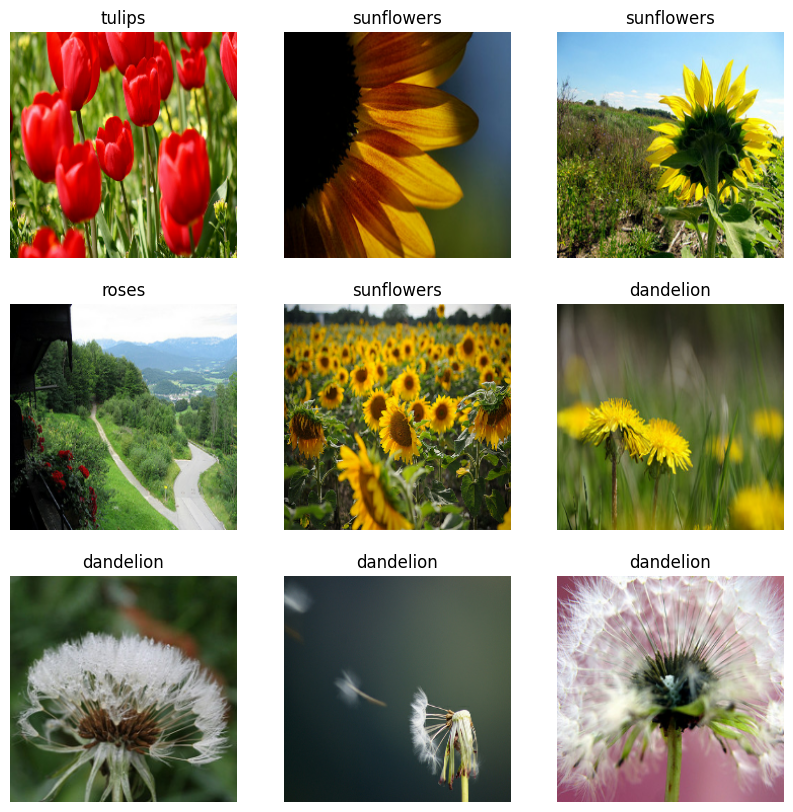

In [12]:
# Import necessary libraries for dataset preparation
import tensorflow_datasets as tfds

# Load the flower dataset
(train_ds, val_ds), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True,
)

# Get class names
num_classes = dataset_info.features['label'].num_classes
class_names = dataset_info.features['label'].names
print(f"Class names: {class_names}")

# Define image size
img_size = 224
batch_size = 32

# Function to preprocess images
def preprocess_image(image, label):
    image = tf.image.resize(image, (img_size, img_size))
    image = preprocess_input(image)
    return image, tf.one_hot(label, depth=num_classes)

# Create training and validation datasets
train_ds = train_ds.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Visualize some training images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Convert from preprocessed format back to displayable format
        display_image = (images[i] + 1) / 2.0  # Approximate reverse of preprocessing
        plt.imshow(display_image)
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

## Training the Transfer Learning Model

Now we'll train our transfer learning model on the flowers dataset. We'll use a small number of epochs for demonstration purposes, but in a real scenario, you might want to train for longer.

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 243ms/step - accuracy: 0.4221 - loss: 1.4349 - val_accuracy: 0.8065 - val_loss: 0.6654 - learning_rate: 1.0000e-04
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7754 - loss: 0.6621 - val_accuracy: 0.8597 - val_loss: 0.4664 - learning_rate: 1.0000e-04
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8544 - loss: 0.4643 - val_accuracy: 0.8869 - val_loss: 0.3844 - learning_rate: 1.0000e-04
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.8691 - loss: 0.3999 - val_accuracy: 0.8937 - val_loss: 0.3465 - learning_rate: 1.0000e-04
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8937 - loss: 0.3456 - val_accuracy: 0.9033 - val_loss: 0.3231 - learning_rate: 1.0000e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9011 - loss: 0.3014 - val_accuracy: 0.9074 - val_loss: 0.3016 - learning_rate: 1.0000e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.914

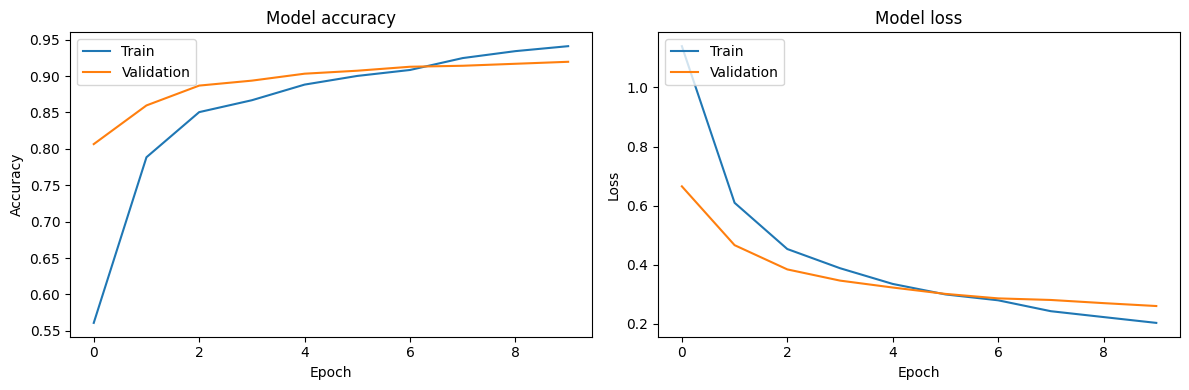

In [14]:
# Define callbacks for training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Start with a small number for demonstration
    callbacks=[early_stopping, reduce_lr]
)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Evaluating Model Performance on New Images

Let's evaluate our trained model by testing it on some new flower images. We'll visualize the predictions alongside the actual images to see how well our model performs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


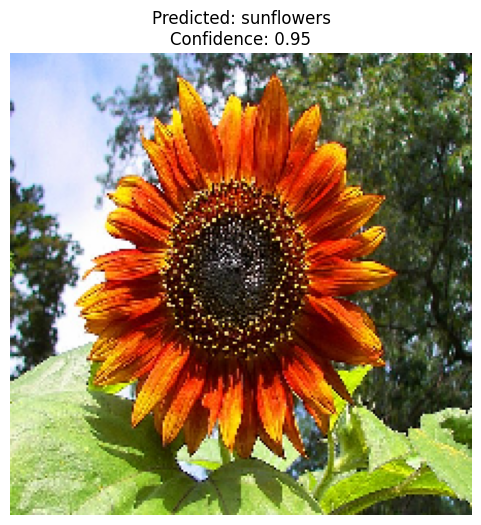

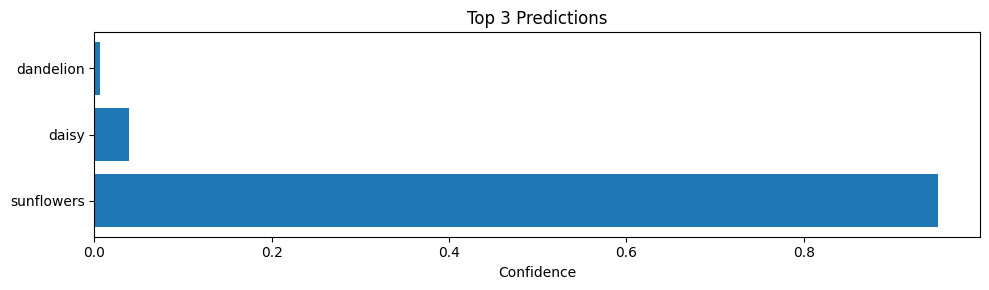

In [15]:
# Function to make predictions on new images
def predict_and_display(model, image_path, class_names):
    # Load and preprocess the image
    img = tf.keras.utils.load_img(image_path, target_size=(img_size, img_size))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = preprocess_input(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()
    confidence = float(predictions[0][predicted_class])

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

    # Show top 3 predictions
    top_indices = tf.argsort(predictions[0], direction='DESCENDING')[:3].numpy()
    plt.figure(figsize=(10, 3))
    plt.barh(range(3), [predictions[0][i] for i in top_indices])
    plt.yticks(range(3), [class_names[i] for i in top_indices])
    plt.xlabel('Confidence')
    plt.title('Top 3 Predictions')
    plt.tight_layout()
    plt.show()

# Download a test image for prediction if needed
test_image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
test_image_path = "/content/test_flower.jpg"
if not os.path.exists(test_image_path):
    !wget -q -O {test_image_path} {test_image_url}

# Make prediction on the test image
predict_and_display(model, test_image_path, class_names)

## Fine-tuning the Model

Now let's fine-tune our model by unfreezing some of the top layers of the base model. This allows the model to adapt the pre-trained features to our specific dataset, potentially improving performance.

0 input_layer_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_

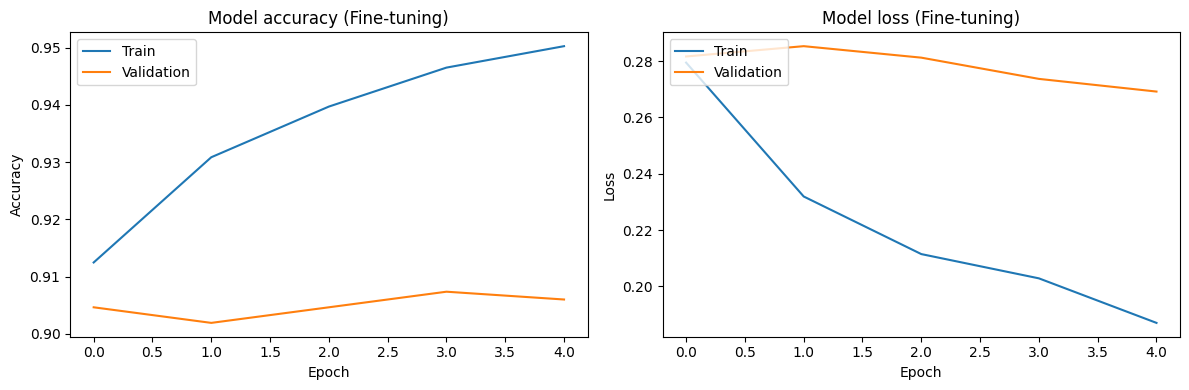

In [18]:
# Unfreeze the top layers of the base model
base_model_features.trainable = True

# Freeze all the layers except the top few
for layer in base_model_features.layers[:-4]:
    layer.trainable = False

# Check which layers are trainable
for i, layer in enumerate(base_model_features.layers):
    print(i, layer.name, layer.trainable)

# Recompile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training with fine-tuning
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,  # A few more epochs for fine-tuning
    callbacks=[early_stopping, reduce_lr]
)

# Plot the fine-tuning history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(fine_tune_history.history['accuracy'])
plt.plot(fine_tune_history.history['val_accuracy'])
plt.title('Model accuracy (Fine-tuning)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(fine_tune_history.history['loss'])
plt.plot(fine_tune_history.history['val_loss'])
plt.title('Model loss (Fine-tuning)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Saving and Loading the Model

Now that we've trained and fine-tuned our model, let's save it so we can use it later without having to retrain. We'll save both the entire model using the recommended .keras format and a TensorFlow Lite version for mobile deployment.

In [20]:
# Save the entire model with .keras extension (recommended format)
model_save_path = "/content/flower_classifier_model.keras"
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Save as SavedModel format for TensorFlow Lite conversion
savedmodel_path = "/content/flower_classifier_savedmodel"
tf.saved_model.save(model, savedmodel_path)
print(f"SavedModel saved to {savedmodel_path}")

# Convert to TensorFlow Lite for mobile deployment
converter = tf.lite.TFLiteConverter.from_saved_model(savedmodel_path)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = "/content/flower_classifier_model.tflite"
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)
print(f"TFLite model saved to {tflite_model_path}")

# Test loading the saved Keras model
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully!")

# Verify the loaded model works the same
img = tf.keras.utils.load_img(test_image_path, target_size=(img_size, img_size))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

# Compare predictions from original and loaded models
original_pred = model.predict(img_array)
loaded_pred = loaded_model.predict(img_array)

print("Original model prediction:", class_names[tf.argmax(original_pred[0]).numpy()])
print("Loaded model prediction:", class_names[tf.argmax(loaded_pred[0]).numpy()])

Model saved to /content/flower_classifier_model.keras
SavedModel saved to /content/flower_classifier_savedmodel
TFLite model saved to /content/flower_classifier_model.tflite
Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Original model prediction: sunflowers
Loaded model prediction: sunflowers
